In [2]:
#------------import libaries-----------------------#
import numpy as np
import pandas as pd
import math
import math
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
#------------generate features and labels-----------------------#
data = pd.read_csv('traceDMA.txt', sep=" ",names=["Port", "Size", "Class"])
feature = np.array(data.drop(["Class"], axis = 1))
label = np.array(data.drop(["Port", "Size"], axis = 1))

1.1 linear axis scaling

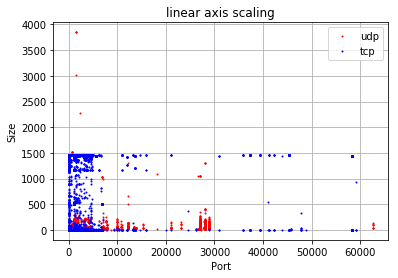

In [4]:
#------------problem 1 => linear axis scaling-----------------------#
udpx , udpy , tcpx , tcpy = [] , [] , [] , []
for i in range(len(feature)) :
    if label[i] == "udp" :
        udpx.append(feature[i][0])
        udpy.append(feature[i][1])
    elif label[i] == "tcp" :
        tcpx.append(feature[i][0])
        tcpy.append(feature[i][1])
plt.plot(udpx,udpy,'ro',label='udp',markersize=1)
plt.plot(tcpx,tcpy,'bo',label='tcp',markersize=1)
plt.title("linear axis scaling")
plt.xlabel("Port")
plt.ylabel("Size")
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

1.2 log axis scaling

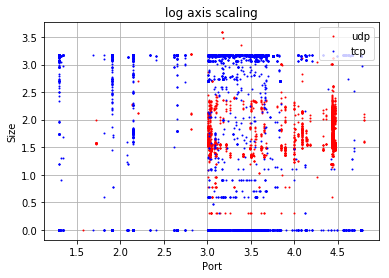

In [5]:
#------------problem 1 => log axis scaling-----------------------#
udpx , udpy , tcpx , tcpy = [] , [] , [] , []
for i in range(len(feature)) :
    logx = 0 if feature[i][0] == 0 else math.log10(feature[i][0])
    logy = 0 if feature[i][1] == 0 else math.log10(feature[i][1])
    if label[i] == "udp" :
        udpx.append(logx)
        udpy.append(logy)
    elif label[i] == "tcp" :
        tcpx.append(logx)
        tcpy.append(logy)
plt.plot(udpx,udpy,'ro',label='udp',markersize=1)
plt.plot(tcpx,tcpy,'bo',label='tcp',markersize=1)
plt.title("log axis scaling")
plt.xlabel("Port")
plt.ylabel("Size")
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

2.1 compute prediction accuracy, and how to generate graphical representations of decision trees.


In [63]:
#------------problem 3&6 => generate decision tree classifier and training error -----#
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feature, label)
print ("Training error : " + str(1-clf.score(feature,label)))

Training error : 0.00019999999999997797


In [68]:
#------------problem 4 => generate graphical representations of decision trees ------#
import graphviz
from os import system
tree.export_graphviz(clf,out_file='tree.dot') 
system("dot -Tpng tree.dot -o tree.png")


0

7.1  Split the data into two parts: A, comprising the first 7,000 records, and B, comprising the last 3,000 records. Train on A then compute the prediction accuracy for B.


In [190]:
#------------problem 7 => split the data into training and testing ------#
X_train, X_test, y_train, y_test = feature[:7000] , feature[7000:] , label[:7000] , label[7000:]
print ((len(X_train)) , (len(y_train)) , (len(X_test)) , (len(y_test)) )
clf_split = DecisionTreeClassifier(random_state=0)
clf_split = clf_split.fit(X_train, y_train)
print ("Training error split version : " + str(1-clf_split.score(X_test,y_test)))

7000 7000 3000 3000
Training error split version : 0.33166666666666667


9.1 Determine a better split of the data (70% training, 30%) and compute the corresponding prediction accuracy

In [191]:
#------------problem 9 => split the data into training and testing advanced method------#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state = None, shuffle = True)
print ((len(X_train)) , (len(y_train)) , (len(X_test)) , (len(y_test)) )
clf_split = DecisionTreeClassifier(random_state=0)
clf_split = clf_split.fit(X_train, y_train)
print ("Training error split version : " + str(1-clf_split.score(X_test,y_test)))

7000 7000 3000 3000
Training error split version : 0.008333333333333304
